In [ ]:
from IPython.display import display,HTML
def dhtml(str):
    display(HTML("""<style>
    @import url('https://fonts.googleapis.com/css?family=Ewert&effect=3d');      
    </style><h1 class='font-effect-3d' style='font-family:Ewert; color:#ff355e'>
    %s</h1>"""%str))

In [ ]:
dhtml('Code Modules & Helpful Functions')

In [ ]:
import warnings; warnings.filterwarnings('ignore')
import numpy as np,pandas as pd,pylab as pl
import tensorflow_hub as th
import zipfile,h5py,urllib
import tensorflow as tf,keras as ks
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.callbacks import ReduceLROnPlateau
import PIL.Image

Using TensorFlow backend.


In [ ]:
fpath='https://olgabelitskaya.github.io/'
hpath='https://tfhub.dev/google/magenta/'+\
      'arbitrary-image-stylization-v1-256/1'
fw1='weights.best.cifar.hdf5'
fw2='weights.best.flowers.hdf5'

In [ ]:
def prepro(x_train,y_train,x_test,y_test):
    n=int(len(x_test)/2)
    x_valid,y_valid=x_test[:n],y_test[:n]
    x_test,y_test=x_test[n:],y_test[n:]
    cy_train=ks.utils.to_categorical(y_train,10) 
    cy_valid=ks.utils.to_categorical(y_valid,10)
    cy_test=ks.utils.to_categorical(y_test,10)
    df=pd.DataFrame([[x_train.shape,x_valid.shape,x_test.shape],
                     [y_train.shape,y_valid.shape,y_test.shape],
                     [cy_train.shape,cy_valid.shape,cy_test.shape]],
                    columns=['train','valid','test'],
                    index=['images','labels','encoded labels'])
    display(df)
    return [[x_train,x_valid,x_test],
            [y_train,y_valid,y_test],
            [cy_train,cy_valid,cy_test]]

In [ ]:
def cb(fw):
    early_stopping=tf.keras.callbacks\
    .EarlyStopping(monitor='val_loss',patience=20,verbose=2)
    checkpointer=tf.keras.callbacks\
    .ModelCheckpoint(filepath=fw,save_best_only=True,verbose=2)
    lr_reduction=tf.keras.callbacks\
    .ReduceLROnPlateau(monitor='val_loss',verbose=2,
                       patience=5,factor=.8)
    return [checkpointer,early_stopping,lr_reduction]

In [ ]:
def get_img(file):
    input_file=urllib.request.urlopen(fpath+file)
    output_file=open(file,'wb'); 
    output_file.write(input_file.read())
    output_file.close(); input_file.close()
def load_img(path_to_img):
    max_dim=512
    img=tf.io.read_file(path_to_img)
    img=tf.image.decode_image(img,channels=3)
    img=tf.image.convert_image_dtype(img,tf.float32)
    shape=tf.cast(tf.shape(img)[:-1],tf.float32)
    long_dim=max(shape)
    scale=max_dim/long_dim
    new_shape=tf.cast(shape*scale,tf.int32)
    img=tf.image.resize(img,new_shape)
    img=img[tf.newaxis,:]
    return img
def tensor_to_image(tensor):
    tensor=tensor*255
    tensor=np.array(tensor,dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0]==1
        tensor=tensor[0]
    return PIL.Image.fromarray(tensor)

In [ ]:
dhtml('Data Loading & Preprocessing')

In [ ]:
(x_train1,y_train1),(x_test1,y_test1)=\
ks.datasets.cifar10.load_data()
[[x_train1,x_valid1,x_test1],
 [y_train1,y_valid1,y_test1],
 [cy_train1,cy_valid1,cy_test1]]=\
prepro(x_train1,y_train1,x_test1,y_test1)

170500096/170498071 [==============================] - 2s 0us/step


,train,valid,test
images,"(50000, 32, 32, 3)","(5000, 32, 32, 3)","(5000, 32, 32, 3)"
labels,"(50000, 1)","(5000, 1)","(5000, 1)"
encoded labels,"(50000, 10)","(5000, 10)","(5000, 10)"


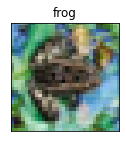

In [ ]:
cifar_labels=['airplane','automobile','bird','cat','deer',
              'dog','frog','horse','ship','truck']
pl.figure(figsize=(2,2)) 
pl.xticks([]); pl.yticks([])
pl.title(cifar_labels[y_train1[200][0]])
pl.imshow(x_train1[200]);

In [ ]:
zf='FlowerColorImages.h5.zip'
input_file=urllib.request.urlopen(fpath+zf)
output_file=open(zf,'wb'); 
output_file.write(input_file.read())
output_file.close(); input_file.close()
zipf=zipfile.ZipFile(zf,'r')
zipf.extractall(''); zipf.close()
f=h5py.File(zf[:-4],'r') 
keys=list(f.keys()); keys
images=np.array(f[keys[0]])/255
labels=np.array(f[keys[1]]).astype('int').reshape(-1,1)
x_train2,x_test2,y_train2,y_test2=\
train_test_split(images,labels,test_size=.2,random_state=1)
del images,labels
[[x_train2,x_valid2,x_test2],
 [y_train2,y_valid2,y_test2],
 [cy_train2,cy_valid2,cy_test2]]=\
prepro(x_train2,y_train2,x_test2,y_test2)

,train,valid,test
images,"(168, 128, 128, 3)","(21, 128, 128, 3)","(21, 128, 128, 3)"
labels,"(168, 1)","(21, 1)","(21, 1)"
encoded labels,"(168, 10)","(21, 10)","(21, 10)"


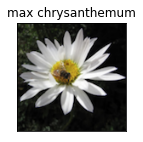

In [ ]:
flower_labels=['phlox','rose','calendula','iris',
               'max chrysanthemum','bellflower','viola',
               'rudbeckia laciniata','peony','aquilegia']
pl.figure(figsize=(2,2)) 
pl.xticks([]); pl.yticks([])
pl.title(flower_labels[y_train2[150][0]])
pl.imshow(x_train2[150]);

In [ ]:
dhtml('Fast Examples')

40960/35363 [==================================] - 0s 0us/step
('crane', 0.1491689)
('lakeside', 0.11947847)
('pirate', 0.072678655)
('missile', 0.052838102)
('wreck', 0.0494856)


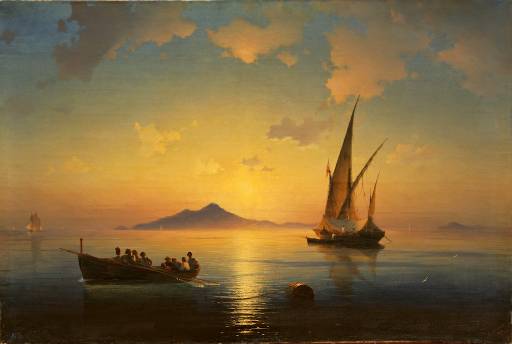

In [ ]:
get_img('picture02.png')
content_image=load_img('picture02.png')
x=tf.keras.applications.vgg19\
.preprocess_input(content_image*255)
x=tf.image.resize(x,(224,224))
vgg19=tf.keras.applications\
.VGG19(include_top=True,weights='imagenet')
prediction_probabilities=vgg19(x)
predicted_top5=tf.keras.applications.vgg19\
.decode_predictions(prediction_probabilities.numpy())[0]
[print((class_name,prob)) 
 for (number,class_name,prob) in predicted_top5]
tensor_to_image(content_image)

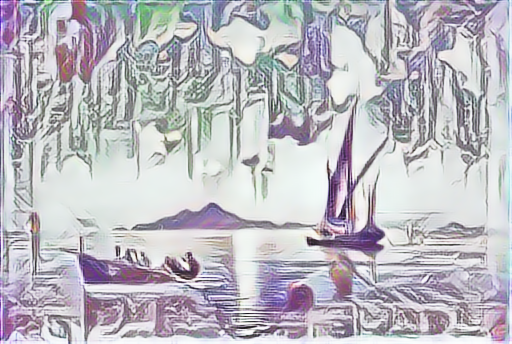

In [ ]:
hub_module=th.load(hpath)
get_img('picture02.png')
get_img('pattern05.jpeg')
content_image=load_img('picture02.png')
style_image=load_img('pattern05.jpeg')
stylized_image=hub_module(tf.constant(content_image),
                          tf.constant(style_image))[0]
tensor_to_image(stylized_image)

In [ ]:
dhtml('Keras Models')

In [ ]:
def mlp_model(s):
    model=tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(s,s,3)),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.BatchNormalization(),    
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.BatchNormalization(),    
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.BatchNormalization(),   
        tf.keras.layers.Dense(1024,activation='relu'),
        tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(10,activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model=mlp_model(32)
model.fit(x_train1,y_train1,epochs=100,
          batch_size=16,callbacks=cb(fw1),
          validation_data=(x_valid1,y_valid1));

Epoch 1/100
3117/3125 [============================>.] - ETA: 0s - loss: 1.9499 - accuracy: 0.3236
Epoch 00001: val_loss improved from inf to 3.27967, saving model to weights.best.cifar.hdf5
3125/3125 [==============================] - 10s 3ms/step - loss: 1.9494 - accuracy: 0.3239 - val_loss: 3.2797 - val_accuracy: 0.2900 - lr: 0.0010
Epoch 2/100
3116/3125 [============================>.] - ETA: 0s - loss: 1.7111 - accuracy: 0.3900
Epoch 00002: val_loss improved from 3.27967 to 1.67479, saving model to weights.best.cifar.hdf5
3125/3125 [==============================] - 9s 3ms/step - loss: 1.7106 - accuracy: 0.3900 - val_loss: 1.6748 - val_accuracy: 0.4054 - lr: 0.0010
Epoch 3/100
3108/3125 [============================>.] - ETA: 0s - loss: 1.6486 - accuracy: 0.4140
Epoch 00003: val_loss improved from 1.67479 to 1.60567, saving model to weights.best.cifar.hdf5
3125/3125 [==============================] - 9s 3ms/step - loss: 1.6479 - accuracy: 0.4142 - val_loss: 1.6057 - val_accuracy: 

In [ ]:
model.load_weights(fw1)
model.evaluate(x_test1,y_test1)

157/157 [==============================] - 0s 2ms/step - loss: 1.6739 - accuracy: 0.4992


[1.6739321947097778, 0.4991999864578247]

In [ ]:
model=mlp_model(128)
model.fit(x_train2,y_train2,epochs=100,batch_size=16,
          validation_data=(x_valid2,y_valid2),
          callbacks=cb(fw2))

Epoch 1/100
10/11 [==========================>...] - ETA: 0s - loss: 2.2947 - accuracy: 0.2500    
Epoch 00001: val_loss improved from inf to 5.59343, saving model to weights.best.flowers.hdf5
11/11 [==============================] - 0s 31ms/step - loss: 2.2616 - accuracy: 0.2679 - val_loss: 5.5934 - val_accuracy: 0.1905 - lr: 0.0010
Epoch 2/100
10/11 [==========================>...] - ETA: 0s - loss: 1.3171 - accuracy: 0.5688
Epoch 00002: val_loss did not improve from 5.59343
11/11 [==============================] - 0s 9ms/step - loss: 1.2877 - accuracy: 0.5714 - val_loss: 6.8493 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 3/100
10/11 [==========================>...] - ETA: 0s - loss: 0.8361 - accuracy: 0.6938
Epoch 00003: val_loss improved from 5.59343 to 4.34838, saving model to weights.best.flowers.hdf5
11/11 [==============================] - 0s 23ms/step - loss: 0.8672 - accuracy: 0.6905 - val_loss: 4.3484 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 4/100
10/11 [=====================

In [ ]:
model.load_weights(fw2)
model.evaluate(x_test2,y_test2)

1/1 [==============================] - 0s 875us/step - loss: 2.7348 - accuracy: 0.3810


[2.7347590923309326, 0.380952388048172]

In [ ]:
def cnn_model(s):
    model=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32,(5,5),padding='same',
                               input_shape=(s,s,3)),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(.25),
        tf.keras.layers.Conv2D(196,(5,5)),
        tf.keras.layers.Activation('relu'),    
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(.25),
        tf.keras.layers.GlobalAveragePooling2D(),    
        tf.keras.layers.Dense(512),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(.25),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(.25),
        tf.keras.layers.Dense(10,activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model=cnn_model(32)
model.fit(x_train1,cy_train1,epochs=100,batch_size=64,
          validation_data=(x_valid1,cy_valid1),
          callbacks=cb(fw1))

Epoch 1/100
782/782 [==============================] - ETA: 0s - loss: 1.9131 - accuracy: 0.3006
Epoch 00001: val_loss improved from inf to 1.52403, saving model to weights.best.cifar.hdf5
782/782 [==============================] - 5s 6ms/step - loss: 1.9131 - accuracy: 0.3006 - val_loss: 1.5240 - val_accuracy: 0.4450 - lr: 0.0010
Epoch 2/100
775/782 [============================>.] - ETA: 0s - loss: 1.5374 - accuracy: 0.4385
Epoch 00002: val_loss improved from 1.52403 to 1.41547, saving model to weights.best.cifar.hdf5
782/782 [==============================] - 5s 6ms/step - loss: 1.5371 - accuracy: 0.4385 - val_loss: 1.4155 - val_accuracy: 0.4884 - lr: 0.0010
Epoch 3/100
774/782 [============================>.] - ETA: 0s - loss: 1.4079 - accuracy: 0.4944
Epoch 00003: val_loss improved from 1.41547 to 1.28339, saving model to weights.best.cifar.hdf5
782/782 [==============================] - 5s 6ms/step - loss: 1.4071 - accuracy: 0.4944 - val_loss: 1.2834 - val_accuracy: 0.5450 - lr: 

In [ ]:
model.load_weights(fw1)
model.evaluate(x_test1,cy_test1)

In [ ]:
model=cnn_model(128)
model.fit(x_train2,cy_train2,epochs=100,batch_size=64,
          validation_data=(x_valid2,cy_valid2),
          callbacks=cb(fw2))

In [ ]:
model.load_weights(fw2)
model.evaluate(x_test2,cy_test2)

In [ ]:
def rnn_model(s,h):
    model=tf.keras.models.Sequential([
        tf.keras.layers.BatchNormalization(input_shape=(1,s*s*3)),
        tf.keras.layers.LSTM(h,return_sequences=True), 
        tf.keras.layers.LSTM(h,return_sequences=True),
        tf.keras.layers.LSTM(h),         
        tf.keras.layers.Dense(10,activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy',
                  optimizer='nadam',metrics=['accuracy'])    
    return model 

In [ ]:
model=rnn_model(32,128)
model.fit(x_train1.reshape(-1,1,32*32*3),cy_train1,
          epochs=50,batch_size=128,
          validation_data=(x_valid1.reshape(-1,1,32*32*3),
                           cy_valid1),
          callbacks=cb(fw1))

In [ ]:
model.load_weights(fw1)
model.evaluate(x_test1.reshape(-1,1,32*32*3),cy_test1)

In [ ]:
model=rnn_model(128,256)
model.fit(x_train2.reshape(-1,1,128*128*3),cy_train2,
          epochs=50,batch_size=128,
          validation_data=(x_valid2.reshape(-1,1,128*128*3),
                           cy_valid2),
          callbacks=cb(fw2))

In [ ]:
model.load_weights(fw2)
model.evaluate(x_test2.reshape(-1,1,128*128*3),cy_test2)